In [1]:
import sys
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
#from config import API_KEY, gkey
from pprint import pprint
import gmaps
from scipy.stats import linregress

In [2]:
beer_reviews = pd.read_csv('../beer_reviews.csv')
type(beer_reviews)
beer_reviews.head()
beer = beer_reviews.groupby(["beer_name","brewery_name","beer_style"])
beer_df = pd.DataFrame(beer.mean())
beer_df

,,,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_name,brewery_name,beer_style,,,,,,,,,
! (Old Ale),Närke Kulturbryggeri AB,Old Ale,10902.0,1.271638e+09,4.000000,4.500000,4.000000,4.000000,4.500000,8.20,57645.0
"""100""",The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,1.254407e+09,4.000000,4.000000,4.000000,4.000000,4.400000,10.00,49236.0
"""100"" Pale Ale",Aviator Brewing Company,American IPA,18635.0,1.245965e+09,4.000000,4.000000,3.500000,4.000000,4.000000,6.60,50696.0
"""12"" Belgian Golden Strong Ale",Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,1.245585e+09,4.000000,3.500000,4.250000,4.750000,4.500000,9.00,44353.0
"""33"" Export",Baltika-Baku,Dortmunder / Export Lager,13640.0,1.200595e+09,3.000000,3.000000,3.000000,3.166667,3.000000,4.80,30080.0
"""4"" Horse Oatmeal Stout",Thoroughbreds Grill & Brewing,Oatmeal Stout,9819.0,1.126683e+09,4.000000,3.500000,4.000000,3.250000,3.250000,NaN,25570.0
"""400"" Ale",Williamsburg AleWerks,American Brown Ale,14952.0,1.201561e+09,3.333333,3.833333,3.916667,3.750000,3.444444,NaN,36909.0
"""50"" Golden Anniversary Lager",Mia & Pia's Pizzeria And Brewhouse,American Pale Lager,10434.0,1.100831e+09,4.000000,3.500000,5.000000,3.500000,3.500000,4.00,20819.0
"""76"" Anniversary Ale",Bootlegger's Brewery,Old Ale,17271.0,1.260115e+09,4.000000,4.166667,3.666667,4.000000,4.166667,7.60,51029.0


In [3]:
br = beer_df #get it?

#brewery_id	review_time	review_overall	review_aroma	review_appearance	review_palate	review_taste	beer_abv	beer_beerid

#x = list(range(0, len(df.index.tolist()), 1))
#y = df['Close']

#date_x = df.index

#fit = np.polyfit(x,y, 1)
#fit_fn = np.poly1d(fit)

#plt.plot(date_x, fit_fn(x), 'k-')
#plt.plot(date_x, y, 'go', ms=2)

In [4]:
#multiplelinear regression
#https://stackoverflow.com/questions/11479064/multiple-linear-regression-in-python
#from sklearn import linear_model
#clf = linear_model.LinearRegression()
#clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in texts],
#        [t.y for t in texts])

In [5]:
#palate 
#ignore references to aroma

aroma = br[['review_palate','review_overall']]
ar = pd.DataFrame(aroma)
ar.dropna()
xpalate = ar['review_palate']
aroma_min = xpalate.min()
aroma_max = xpalate.max()
yy = ar['review_overall']
xpalate = xpalate.tolist()
yy = yy.tolist()
palateRegress = linregress(xpalate,yy)
pr = palateRegress
print(pr)
p1 = pr[0]*aroma_min + pr[1]
print(p1)
p2 = pr[0]*aroma_max + pr[1]
print(p2)
#ar.head()

LinregressResult(slope=0.86292117981710958, intercept=0.57096202502748028, rvalue=0.80424748307213723, pvalue=0.0, stderr=0.0024869382193900376)
1.43388320484
4.88556792411


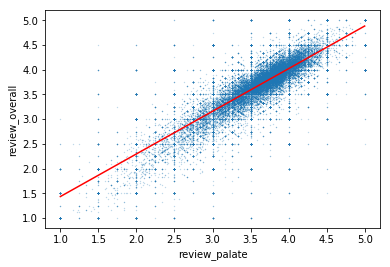

In [6]:
beer_df.plot.scatter('review_palate', 'review_overall', s=.1, alpha=.4)
#lt.plot([1,2,3,4,5], pr[1] + pr[0] * x,'-')
plt.plot([aroma_min,aroma_max],[p1,p2], 'r-')
plt.savefig('palate.png', bbox_inches="tight")
plt.show()

In [7]:
#aroma
#ignore references to aroma

aroma = br[['review_aroma','review_overall']]
ar = pd.DataFrame(aroma)
ar.dropna()
xaroma = ar['review_aroma']
aroma_min = xaroma.min()
aroma_max = xaroma.max()
yy = ar['review_overall']
xaroma = xaroma.tolist()
yy = yy.tolist()
aromaRegress = linregress(xaroma,yy) ###
ar = aromaRegress
print(ar)
a1 = ar[0]*aroma_min + ar[1]
print(a1)
a2 = ar[0]*aroma_max + ar[1]
print(a2)
#ar.head()

LinregressResult(slope=0.78308006049459966, intercept=0.87338429201810808, rvalue=0.74148167792793018, pvalue=0.0, stderr=0.0027637115130424062)
1.65646435251
4.78878459449


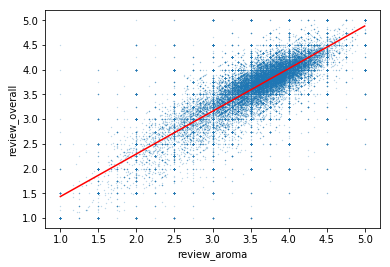

In [8]:
beer_df.plot.scatter('review_aroma', 'review_overall', s=.1, alpha=.4 )
plt.plot([aroma_min,aroma_max],[p1,p2], 'r-')
plt.savefig('aroma.png', bbox_inches="tight")
plt.show()

In [9]:
#appearance

appearance = br[['review_appearance','review_overall']]
ap = pd.DataFrame(appearance)
ap.dropna()

xappear = ap['review_appearance']
app_min = xappear.min()
app_max = xappear.max()
print(app_min)
print(app_max)
yy = ap['review_overall']
xappear = xappear.tolist()
yy = yy.tolist()
appearRegress = linregress(xappear,yy)
ar = appearRegress
a1 = ar[0]*app_min + ar[1]

a2 = ar[0]*app_max + ar[1]
print(p2)
print(ar)

1.0
5.0
4.88556792411
LinregressResult(slope=0.75943957813266005, intercept=0.85642006280284555, rvalue=0.61936879553764956, pvalue=0.0, stderr=0.0037544889467415166)


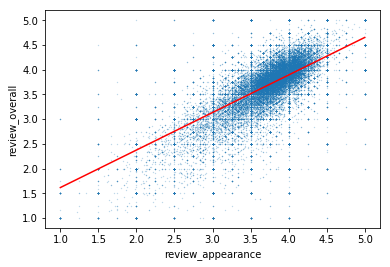

In [10]:
beer_df.plot.scatter('review_appearance', 'review_overall', s=.1, alpha=.4 )
plt.plot([app_min, app_max],[a1,a2],'r-') #this way?
plt.savefig('appearance.png', bbox_inches="tight")
plt.show() 

In [11]:
#taste
taste = br[['review_taste','review_overall']]
ta = pd.DataFrame(taste)
ta.dropna()
xtaste = ta['review_taste']
taste_min = xtaste.min()
taste_max = xtaste.max()
yy = ta['review_overall']
xtaste = xtaste.tolist()
yy = yy.tolist()
tasteRegress = linregress(xtaste,yy)
tr = tasteRegress
print(tr)
t1 = tr[0]*taste_min + tr[1]
print(t1)
t2 = tr[0]*taste_max + tr[1]
print(t2)
#ar.head()

LinregressResult(slope=0.86164764927413584, intercept=0.55428371923905928, rvalue=0.87171830084058766, pvalue=0.0, stderr=0.0018890262203764391)
1.41593136851
4.86252196561


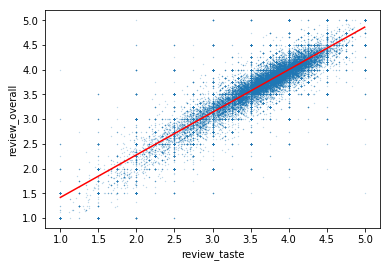

In [12]:
beer_df.plot.scatter('review_taste', 'review_overall',s=.1, alpha=.4 )
#plt.xlim(0,6)
#plt.ylim(0,6)
plt.plot([taste_min, taste_max],[t1,t2],'r-')
plt.savefig('taste.png', bbox_inches="tight")
plt.show()

In [13]:
#abv
abv = br[['beer_abv','review_overall']]
abv = pd.DataFrame(abv)
abv.dropna()
xabv = abv['beer_abv']
x1 = xabv.min()
x2 = xabv.max()
yy = abv['review_overall']
xabv = xabv.tolist()
#print(xabv)
yy = yy.tolist()
abvRegress = linregress(xabv,yy)
abvr = abvRegress
print(abvr)
abv1 = abvr[0]*x1 + abvr[1]
print(abv1)
abv2 = abvr[0]*x2 + abvr[1]
print(abv2)
#ar.head()

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
nan
nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


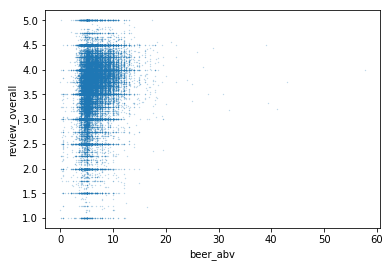

In [14]:
beer_df.plot.scatter('beer_abv', 'review_overall', s=.1, alpha=.4 )
plt.plot([abv1,abv2], [x1,x2] ,'r-')
plt.savefig('abv.png', bbox_inches="tight")
plt.show()